PROTECT 2023

# PROYECTO PROTECT-VERSIÓN 1.0

# 1. Importamos las librerias

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt # time series analysis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Adquisición y carga de datos

Descripción de las variables

- year: año del acto. (numérico)
- month: número del mes del acto. (numérico)
- day: número de día del acto. (numérico)
- countryName: Nombre del país. (objeto)
- city: La ciudad donde se ejecutó el acto. (categórico)
- latitude: Coordenada de la escena del crimen. (coordinación)
- longitude:Coordenada de la escena del crimen. (coordinación)
- attackType: El tipo de acto (bomba/explosión, asalto armado, ataque a instalaciones/infraestructuras, toma de rehenes (secuestro), secuestro, asesinato, desconocido, toma de rehenes (incidente de barricada), asalto sin armas) (categórico)
- killed: Número de personas que murieron en el acto. (numérico)
- wounded: Número de personas que resultaron heridas en el acto. (numérico)
- target: El nombre del objetivo. (objeto)
- summary: Una breve descripción del acto. (objeto)
- group: El grupo terrorista que ejecutó el acto terrorista. (categórico)
- targetType: Tipo de objetivo. (Aeropuertos y aviones, Militar, Gobierno (diplomático), Empresas, Policía, Gobierno (general), Ciudadanos y propiedades privadas, Institución educativa, Periodistas y medios de comunicación, Partido político violento, Turistas, Transporte, Servicios públicos, ONG, Desconocido, Figuras/Instituciones religiosas, Telecomunicaciones, Suministro de alimentos o agua, Marítimo, Terroristas/Milicia no estatal, Otro) (categórico)
- weaponType: El tipo de arma utilizada en el acto. (Explosivos, Incendiarias, Armas de fuego, Desconocidas, Cuerpo a cuerpo, Químicas, Armas falsas, Equipo de sabotaje, Otras) (categórico)
- motive: La motivación del acto. (objeto)
- float64(4): latitud, longitud, muertos, heridos.
- int64(3): año, mes, día.
- objects(9): countryName, city, attackType, target, targetType, summary, group, weaponType, motive.


In [4]:
file_name = 'globalterrorismdb_0718dist.csv'
df = pd.read_csv(file_name, encoding = 'ISO-8859-1')

df = df[['iyear', 'imonth', 'iday', 'extended', 'country', 'provstate', 'region','country_txt', 'success', 'attacktype1_txt', 'targtype1_txt', 'gname',
         'weaptype1_txt']]
df.head()

,iyear,imonth,iday,extended,country,provstate,region,country_txt,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt
0,1970,7,2,0,58,NaN,2,Dominican Republic,1,Assassination,Private Citizens & Property,MANO-D,Unknown
1,1970,0,0,0,130,Federal,1,Mexico,1,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown
2,1970,1,0,0,160,Tarlac,5,Philippines,1,Assassination,Journalists & Media,Unknown,Unknown
3,1970,1,0,0,78,Attica,8,Greece,1,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives
4,1970,1,0,0,101,Fukouka,4,Japan,1,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary


Filtro -Perú y columnas

In [5]:
start_year = 1970
country = 'Peru'
df = df.loc[(df['iyear'] >= start_year) & (df['country_txt'] == country)]
df.head()

,iyear,imonth,iday,extended,country,provstate,region,country_txt,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt
1941,1973,7,4,0,159,Lima,3,Peru,1,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives
1960,1973,7,22,0,159,Lima,3,Peru,1,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives
1961,1973,7,22,0,159,Lima,3,Peru,1,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives
2561,1974,9,19,0,159,Arequipa,3,Peru,1,Bombing/Explosion,Government (Diplomatic),Condor,Explosives
2671,1974,11,21,0,159,Lima,3,Peru,1,Bombing/Explosion,Business,Revolutionary Vanguard,Explosives


In [12]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [13]:
df.isnull().sum()

iyear              0
imonth             0
iday               0
extended           0
country            0
provstate          0
region             0
country_txt        0
success            0
attacktype1_txt    0
targtype1_txt      0
gname              0
weaptype1_txt      0
dtype: int64

In [10]:
df["provstate"].fillna("Lima", inplace = True) 
   

In [11]:
df.isnull().sum()

iyear              0
imonth             0
iday               0
extended           0
country            0
provstate          0
region             0
country_txt        0
success            0
attacktype1_txt    0
targtype1_txt      0
gname              0
weaptype1_txt      0
dtype: int64

# 3. Análisis exploratorio

In [14]:
df.describe()

,iyear,imonth,iday,extended,country,region,success
count,6096.000000,6096.000000,6096.000000,6096.000000,6096.0,6096.0,6096.000000
mean,1987.489337,6.441437,15.645177,0.008694,159.0,3.0,0.944062
std,4.504656,3.278665,8.788160,0.092844,0.0,0.0,0.229821
min,1973.000000,1.000000,0.000000,0.000000,159.0,3.0,0.000000
25%,1984.000000,4.000000,8.000000,0.000000,159.0,3.0,1.000000
50%,1987.000000,7.000000,16.000000,0.000000,159.0,3.0,1.000000
75%,1990.000000,9.000000,23.000000,0.000000,159.0,3.0,1.000000
max,2017.000000,12.000000,31.000000,1.000000,159.0,3.0,1.000000


In [15]:
df.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country', 'provstate', 'region',
       'country_txt', 'success', 'attacktype1_txt', 'targtype1_txt', 'gname',
       'weaptype1_txt'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6096 entries, 1941 to 178638
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   iyear            6096 non-null   int64 
 1   imonth           6096 non-null   int64 
 2   iday             6096 non-null   int64 
 3   extended         6096 non-null   int64 
 4   country          6096 non-null   int64 
 5   provstate        6096 non-null   object
 6   region           6096 non-null   int64 
 7   country_txt      6096 non-null   object
 8   success          6096 non-null   int64 
 9   attacktype1_txt  6096 non-null   object
 10  targtype1_txt    6096 non-null   object
 11  gname            6096 non-null   object
 12  weaptype1_txt    6096 non-null   object
dtypes: int64(7), object(6)
memory usage: 666.8+ KB


Vizualización

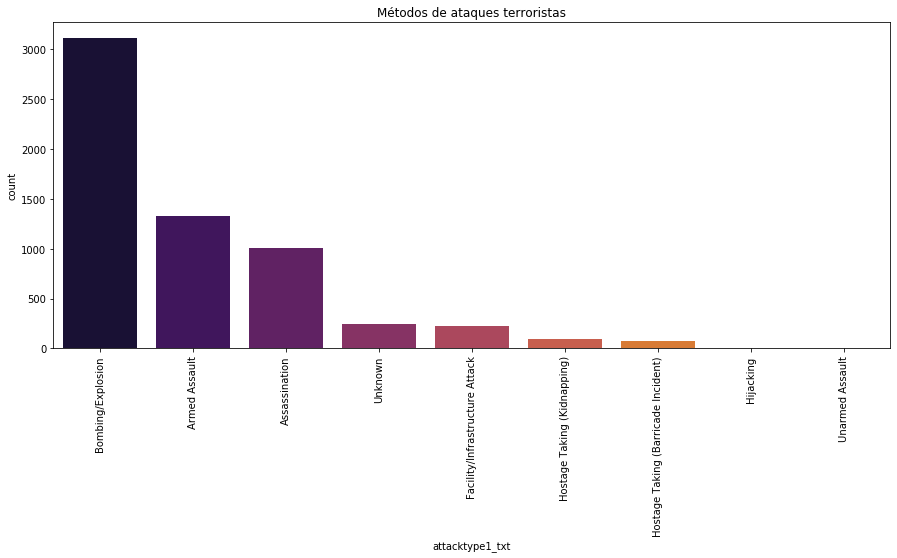

In [17]:
plt.subplots(figsize=(15,6))
sns.countplot('attacktype1_txt',data=df, palette='inferno',order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Métodos de ataques terroristas')
plt.show()


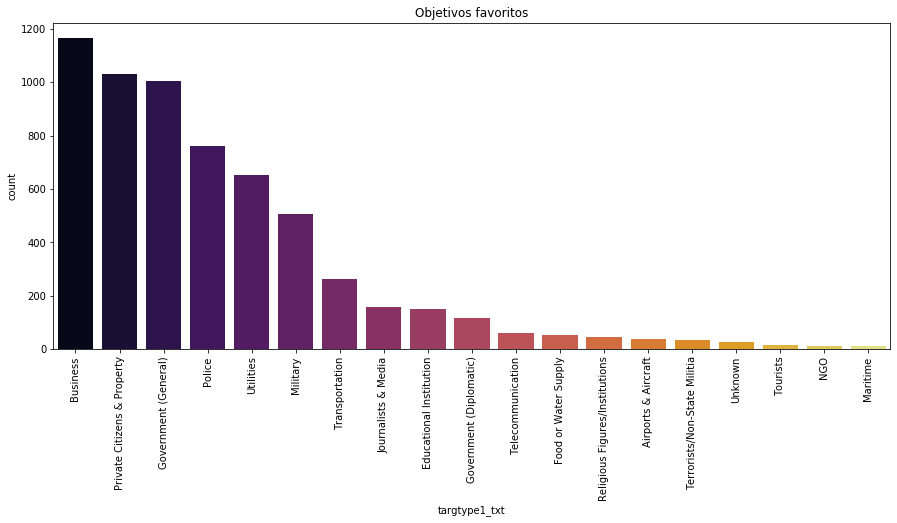

In [18]:
plt.subplots(figsize=(15,6))
sns.countplot(df['targtype1_txt'], palette='inferno', order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Objetivos favoritos')
plt.show()

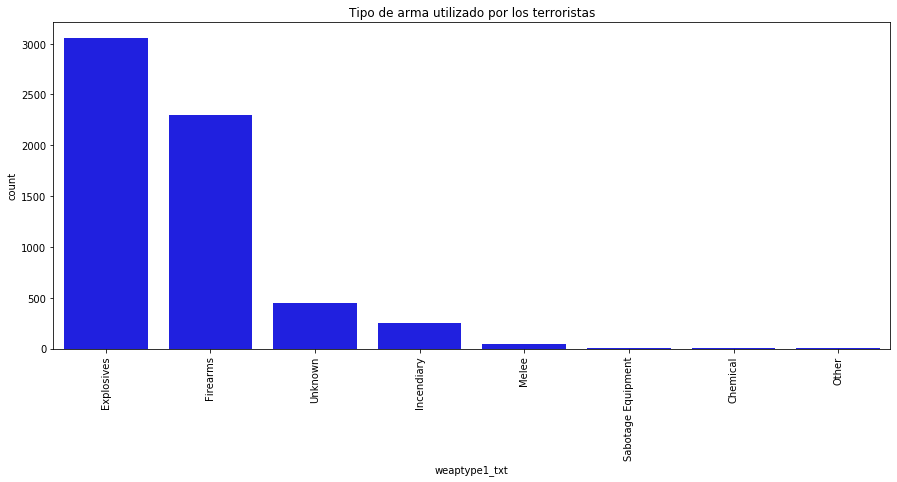

In [19]:
plt.subplots(figsize=(15,6))
sns.countplot(df['weaptype1_txt'],color='blue',order=df['weaptype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Tipo de arma utilizado por los terroristas')
plt.show()

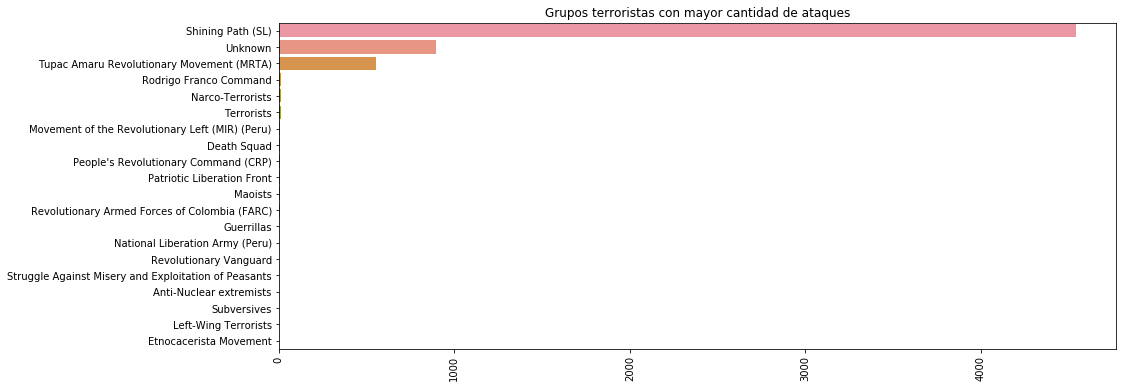

In [20]:
terror_group=df['gname'].value_counts()
plt.subplots(figsize=(15,6))
sns.barplot(terror_group[0:20].values, terror_group[0:20].index)
plt.xticks(rotation=90)
plt.title('Grupos terroristas con mayor cantidad de ataques')
plt.show()

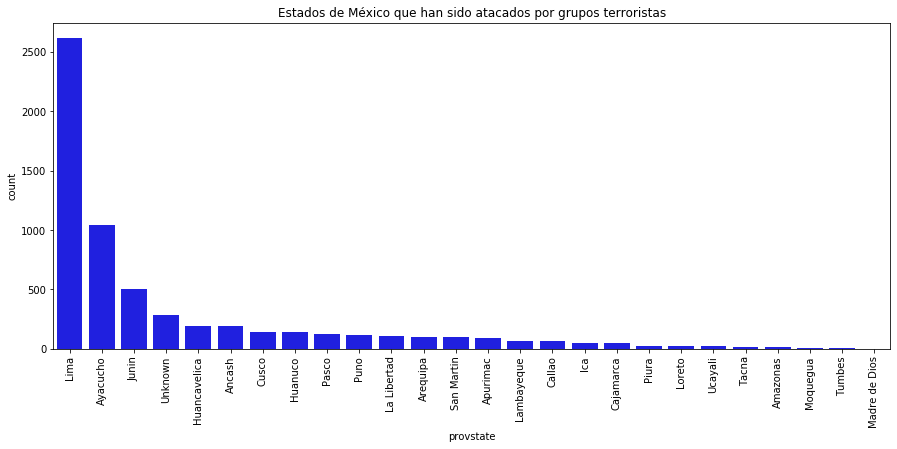

In [21]:
plt.subplots(figsize=(15,6))
sns.countplot(df['provstate'],color='blue',order=df['provstate'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Estados de México que han sido atacados por grupos terroristas')
plt.show()

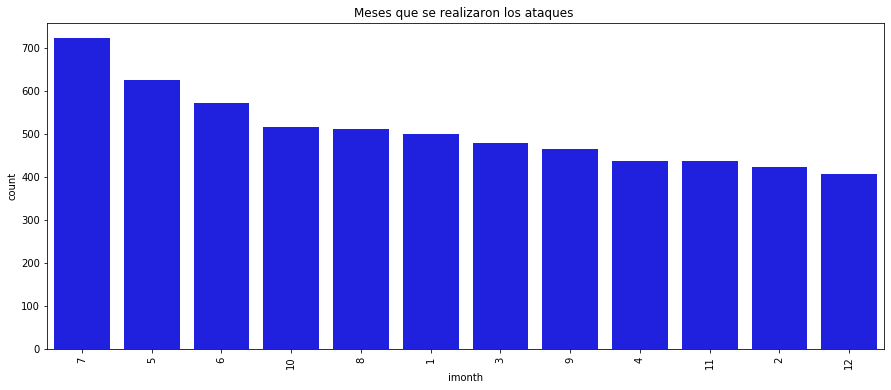

In [22]:
plt.subplots(figsize=(15,6))
sns.countplot(df['imonth'],color='blue',order=df['imonth'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Meses que se realizaron los ataques ')
plt.show()

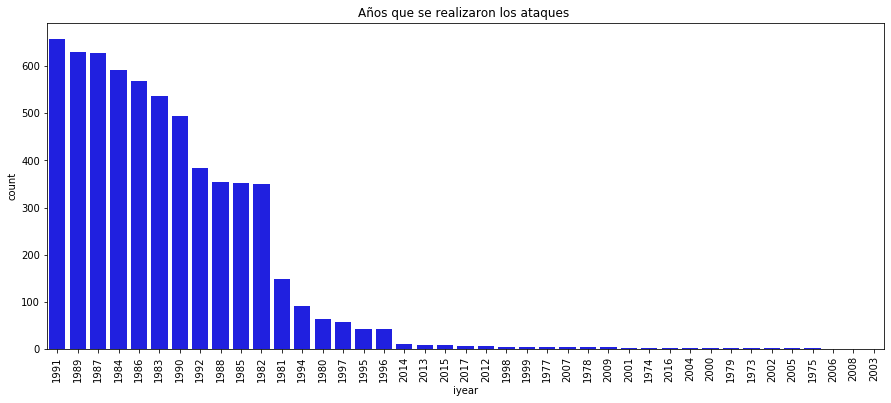

In [23]:
plt.subplots(figsize=(15,6))
sns.countplot(df['iyear'],color='blue',order=df['iyear'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Años que se realizaron los ataques ')
plt.show()

# 4. Feature Engineering


In [88]:
count = df['gname'].value_counts()
count.head(15)

Shining Path (SL)                                  4541
Unknown                                             898
Tupac Amaru Revolutionary Movement (MRTA)           552
Rodrigo Franco Command                               15
Narco-Terrorists                                     14
Terrorists                                           11
Movement of the Revolutionary Left (MIR) (Peru)       7
Death Squad                                           6
People's Revolutionary Command (CRP)                  5
Patriotic Liberation Front                            5
Maoists                                               4
Revolutionary Armed Forces of Colombia (FARC)         4
Guerrillas                                            3
National Liberation Army (Peru)                       2
Revolutionary Vanguard                                2
Name: gname, dtype: int64

In [109]:
# Determines the number of groups to analyze
num_names = 7
names = count.keys()[0:num_names+1]
names = list(names)
names

['Shining Path (SL)',
 'Unknown',
 'Tupac Amaru Revolutionary Movement (MRTA)',
 'Rodrigo Franco Command',
 'Narco-Terrorists',
 'Terrorists',
 'Movement of the Revolutionary Left (MIR) (Peru)',
 'Death Squad']

In [110]:
names


['Shining Path (SL)',
 'Unknown',
 'Tupac Amaru Revolutionary Movement (MRTA)',
 'Rodrigo Franco Command',
 'Narco-Terrorists',
 'Terrorists',
 'Movement of the Revolutionary Left (MIR) (Peru)',
 'Death Squad']

In [111]:
# Dummies convert text data into numeric variables that a model can use
countries = pd.get_dummies(df['country_txt'])
countries.reset_index(drop = True, inplace = True)

states = pd.get_dummies(df['provstate'])
states.reset_index(drop = True, inplace = True)

attacks = pd.get_dummies(df['attacktype1_txt'])
attacks.reset_index(drop = True, inplace = True)

targets = pd.get_dummies(df['targtype1_txt'])
targets.reset_index(drop = True, inplace = True)

weapons = pd.get_dummies(df['weaptype1_txt'])
weapons.reset_index(drop = True, inplace = True)

In [112]:
weapons

,Chemical,Explosives,Firearms,Incendiary,Melee,Other,Sabotage Equipment,Unknown
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6091,0,0,1,0,0,0,0,0
6092,0,0,1,0,0,0,0,0
6093,0,0,0,0,0,0,0,1
6094,0,1,0,0,0,0,0,0


In [113]:
# Combines all dummy variables into one data frame
df.reset_index(drop=True, inplace=True)
df_dummies = pd.concat([df, countries, states, attacks, targets, weapons], axis = 1)

In [114]:
#Drops all text data leaving only numeric data
df_dummies = df_dummies.drop(['country','imonth', 'iday', 'country_txt',
                              'provstate', 'attacktype1_txt','targtype1_txt',
                              'weaptype1_txt'],
                             axis = 1)
df_dummies.head()

,iyear,extended,region,success,gname,Peru,Amazonas,Ancash,Apurimac,Arequipa,...,Unknown,Utilities,Chemical,Explosives,Firearms,Incendiary,Melee,Other,Sabotage Equipment,Unknown
0,1973,0,3,1,Unknown,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1973,0,3,1,Unknown,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1973,0,3,1,Unknown,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1974,0,3,1,Condor,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1974,0,3,1,Revolutionary Vanguard,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [115]:
unknown = df[df['gname'] == 'Unknown']
unknown.head()

,iyear,imonth,iday,extended,country,provstate,region,country_txt,success,attacktype1_txt,targtype1_txt,gname,weaptype1_txt
0,1973,7,4,0,159,Lima,3,Peru,1,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives
1,1973,7,22,0,159,Lima,3,Peru,1,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives
2,1973,7,22,0,159,Lima,3,Peru,1,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives
5,1974,12,7,0,159,Lima,3,Peru,1,Armed Assault,Business,Unknown,Firearms
8,1977,2,22,0,159,Lima,3,Peru,1,Bombing/Explosion,Military,Unknown,Explosives


In [116]:
df_dummies = df_dummies.loc[(df_dummies['gname'] != 'Unknown') & (df_dummies['gname'].isin(names))]
df_dummies.head()

,iyear,extended,region,success,gname,Peru,Amazonas,Ancash,Apurimac,Arequipa,...,Unknown,Utilities,Chemical,Explosives,Firearms,Incendiary,Melee,Other,Sabotage Equipment,Unknown
7,1975,0,3,1,Movement of the Revolutionary Left (MIR) (Peru),1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12,1978,0,3,1,Shining Path (SL),1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
18,1979,1,3,1,Shining Path (SL),1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23,1980,0,3,0,Shining Path (SL),1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
24,1980,0,3,0,Shining Path (SL),1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# 5. Construcción de Modelo

In [117]:
# Splitting up the data for model training
x=df_dummies.loc[:,~df_dummies.columns.isin(['gname'])].values
y=df_dummies.loc[:,'gname'].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4116, 67)
(1030, 67)
(4116,)
(1030,)


In [118]:
# Need to standardize the variables when using the KNeighbors algorithm and Neural Networks 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

# 6. Evaluación del Modelo

In [119]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

import time
import warnings
warnings.filterwarnings('ignore')

# KNeighbors Classifier

In [120]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors':[5,10,15,25,30,50], 'weights': ['uniform','distance']}

grid_knn = GridSearchCV(knn,param_grid,scoring='accuracy',cv = 10,refit = True)

In [121]:
start_time = time.time()

grid_knn.fit(x_train_std,y_train)
print("Best Score ==> ", grid_knn.best_score_)
print("Tuned Paramerers ==> ", grid_knn.best_params_)
print("Accuracy on Train set ==> ", grid_knn.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_knn.score(x_test_std,y_test))

end_time = time.time()
run_time = end_time - start_time
print('Runtime of the Grid Search for the KNeighbors Algorithm: {:.5f}s'.format(run_time))

Best Score ==>  0.8986889660548508
Tuned Paramerers ==>  {'n_neighbors': 50, 'weights': 'distance'}
Accuracy on Train set ==>  0.9390184645286687
Accuracy on Test set ==>  0.9067961165048544
Runtime of the Grid Search for the KNeighbors Algorithm: 38.29574s


In [122]:
start_time = time.time()

knn = KNeighborsClassifier(**grid_knn.best_params_)
knn.fit(x_train_std, y_train)

print("Accuracy on Train set ==> ", knn.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", knn.score(x_test_std,y_test))

end_time = time.time()
kn_run_time = end_time - start_time

print('Runtime of the KNeighbors Classifier Algorithm: {:.5f}s'.format(kn_run_time))

Accuracy on Train set ==>  0.9390184645286687
Accuracy on Test set ==>  0.9067961165048544
Runtime of the KNeighbors Classifier Algorithm: 3.93519s


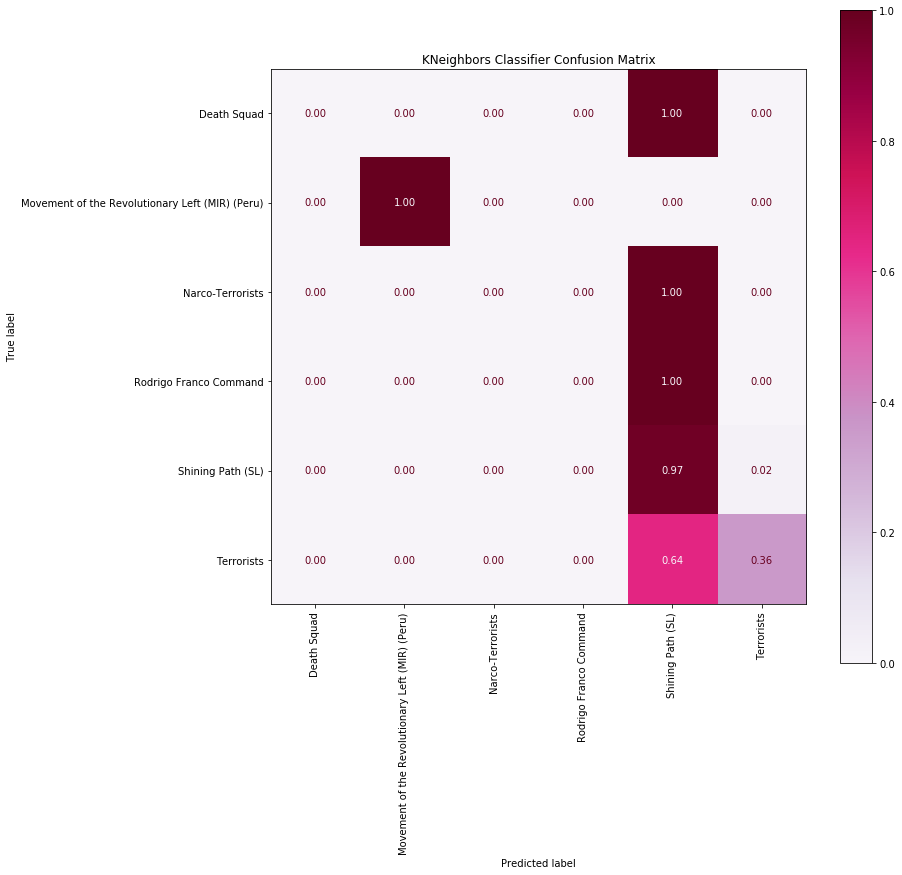

In [123]:
fig, ax = plt.subplots(figsize = (12,12))

matrix = plot_confusion_matrix(knn, x_test_std, y_test, ax=ax, xticks_rotation='vertical',
                               cmap='PuRd', normalize='true', values_format='.2f')
plt.title('KNeighbors Classifier Confusion Matrix')
plt.show()

# Naive Bayes

In [124]:
from sklearn.naive_bayes import GaussianNB

In [125]:
# Don't need to standardize variables here
start_time = time.time()

nb = GaussianNB()
nb.fit(x_train, y_train)

print("Accuracy on Train set ==> ", nb.score(x_train,y_train))
print("Accuracy on Test set ==> ", nb.score(x_test,y_test))

end_time = time.time()
nb_run_time = end_time - start_time

print('Runtime of the Naive Bayes Algorithm: {:.5f}s'.format(nb_run_time))

Accuracy on Train set ==>  0.2524295432458698
Accuracy on Test set ==>  0.23300970873786409
Runtime of the Naive Bayes Algorithm: 0.10510s


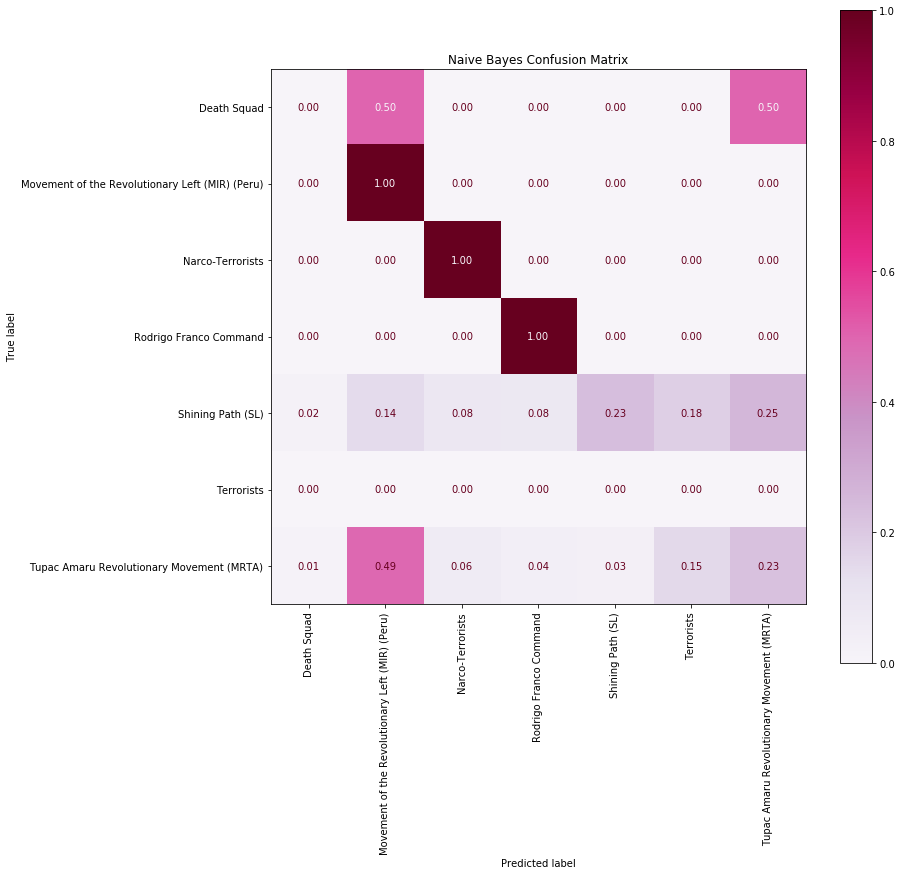

In [126]:
fig, ax = plt.subplots(figsize = (12,12))

matrix = plot_confusion_matrix(nb, x_test, y_test, ax=ax, xticks_rotation='vertical', 
                               cmap='PuRd', normalize='true', values_format='.2f')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Neural Network

In [127]:
from sklearn.neural_network import MLPClassifier

In [128]:
start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(40,40,40), max_iter=300, random_state=42)
mlp.fit(x_train_std, y_train)

print("Accuracy on Train set ==> ", mlp.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", mlp.score(x_test_std,y_test))

end_time = time.time()
mlp_run_time = end_time - start_time

print('Runtime of the Neural Network: {:.5f}s'.format(mlp_run_time))

Accuracy on Train set ==>  0.9329446064139941
Accuracy on Test set ==>  0.9067961165048544
Runtime of the Neural Network: 12.66970s


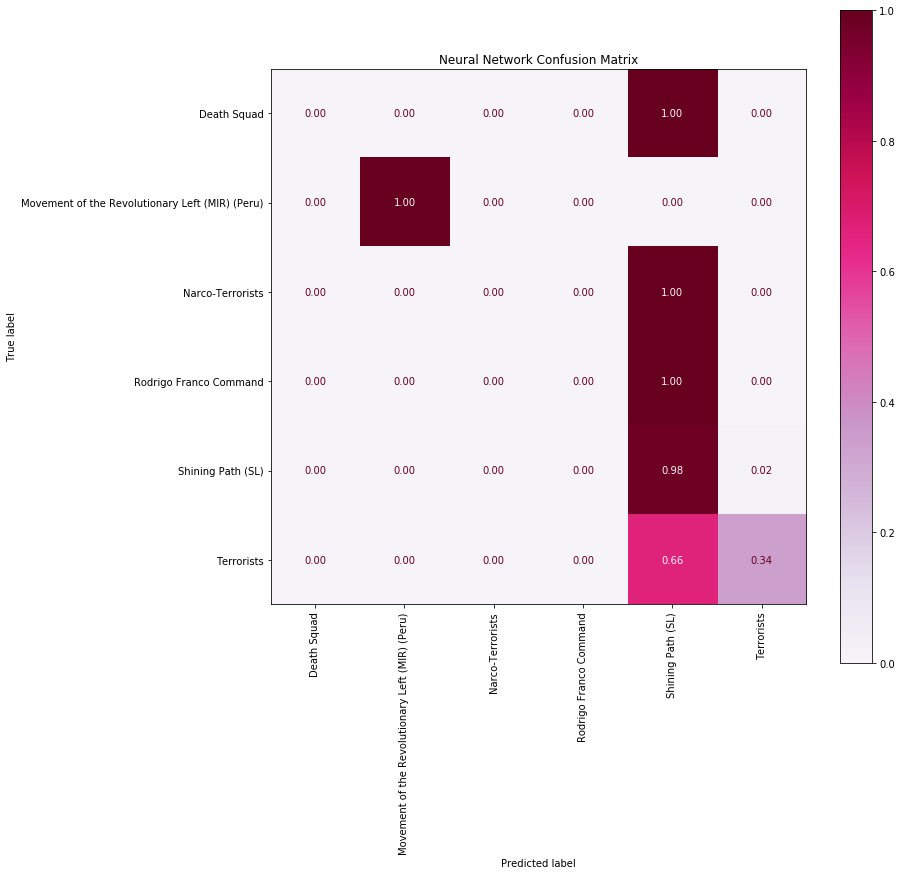

In [129]:
fig, ax = plt.subplots(figsize = (12,12))

matrix = plot_confusion_matrix(mlp, x_test_std, y_test, ax=ax, xticks_rotation='vertical',
                               cmap='PuRd', normalize='true', values_format='.2f')
plt.title('Neural Network Confusion Matrix')
plt.show()

# Summary

In [132]:
print("Accuracy on Test set using KNeighbors: {:.4%}".format(knn.score(x_test_std,y_test)))
print('Runtime of the KNeighbors Classifier Algorithm: {:.4f}s'.format(kn_run_time))


print()

print("Accuracy on Test set using Naive Bayes: {:.4%}".format(nb.score(x_test,y_test)))
print('Runtime of the Naive Bayes Algorithm: {:.4f}s'.format(nb_run_time)) 

print()

print("Accuracy on Test set using Neural Network: {:.4%}".format(mlp.score(x_test_std,y_test)))
print('Runtime of the Neural Network: {:.4f}s'.format(mlp_run_time))

Accuracy on Test set using KNeighbors: 90.6796%
Runtime of the KNeighbors Classifier Algorithm: 3.9352s

Accuracy on Test set using Naive Bayes: 23.3010%
Runtime of the Naive Bayes Algorithm: 0.1051s

Accuracy on Test set using Neural Network: 90.6796%
Runtime of the Neural Network: 12.6697s
